 
# Matplotlib 必须掌握的 50 个可视化图表（附完整 Python 源代码）

本文总结了 Matplotlib 以及 Seaborn 用的最多的50个图形，掌握这些图形的绘制，对于数据分析的可视化有莫大的作用，强烈推荐大家阅读后续内容。

如果觉得内容不错，欢迎分享到您的朋友圈。

Tips：

（1）本文原文部分代码有不准确的地方，已进行修改；

（2）所有正确的源代码，我已整合到 jupyter notebook 文件中，可以在公众号『Python数据之道』后台回复 “code”，可获得本文源代码；

（3）运行本文代码，除了安装 matplotlib 和 seaborn 可视化库外，还需要安装其他的一些辅助可视化库，已在代码部分作标注，具体内容请查看下面文章内容。

（4）本文完整的翻译文章来自 http://liyangbit.com/



在数据分析和可视化中最有用的 50 个 Matplotlib 图表。 这些图表列表允许您使用 python 的 matplotlib 和 seaborn 库选择要显示的可视化对象。

## 介绍
这些图表根据可视化目标的7个不同情景进行分组。 例如，如果要想象两个变量之间的关系，请查看“相关”部分下的图表。 或者，如果您想要显示值如何随时间变化，请查看“更改”部分，依此类推。


有效图表的重要特征：

* 在不歪曲事实的情况下传达正确和必要的信息。
* 设计简单，您不必太费力就能理解它。
* 从审美角度支持信息而不是掩盖信息。
* 信息没有超负荷。

## 准备工作

在代码运行前先引入下面的设置内容。 当然，单独的图表，可以重新设置显示要素。

plt设置seaborn的style的可能选项有：bright，colorblind，dark，dark-palette，darkgrid，deep，muted，notebook，paper，pastel，poster，talk，ticks，white，whitegrid

In [22]:
# !pip install brewer2mpl
import numpy as np
from random import randint
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')



large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style("white")
%matplotlib inline

# 设置中文显示
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.6.2
0.13.2


## 排序 （Ranking）

### 有序条形图 （Ordered Bar Chart）

有序条形图有效地传达了项目的排名顺序。 但是，在图表上方添加度量标准的值，用户可以从图表本身获取精确信息。

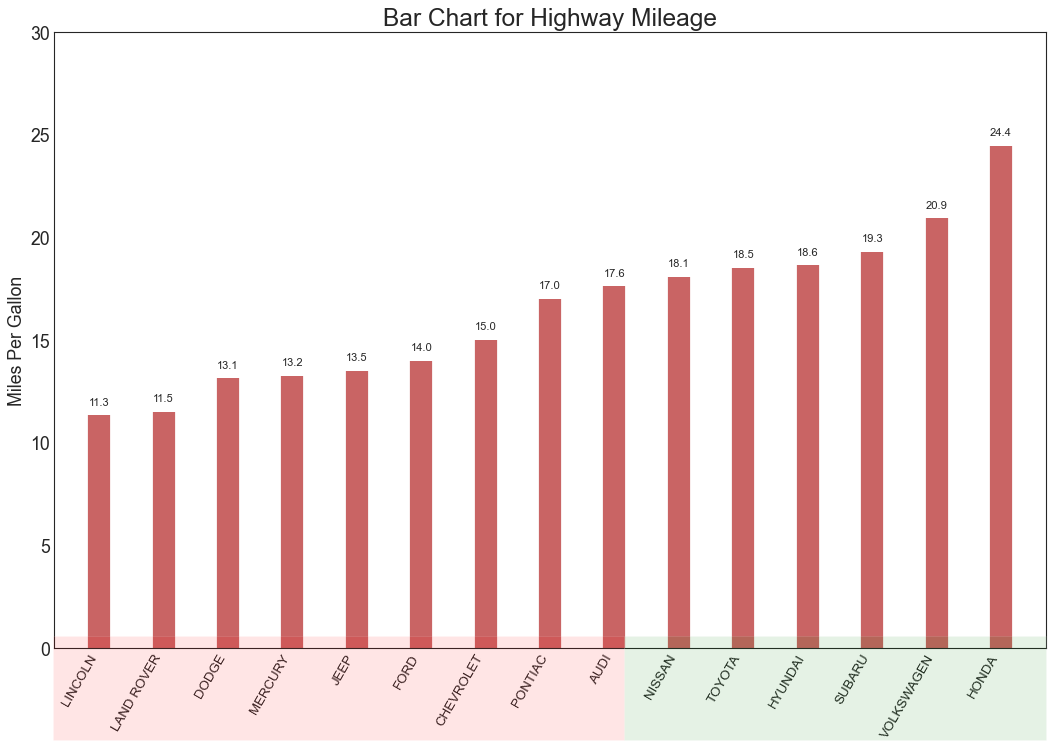

In [83]:
# Prepare Data
df_raw = pd.read_csv("Data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Add patches to color the X axis labels
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)
plt.show()

### 棒棒糖图 （Lollipop Chart）

棒棒糖图表以一种视觉上令人愉悦的方式提供与有序条形图类似的目的。

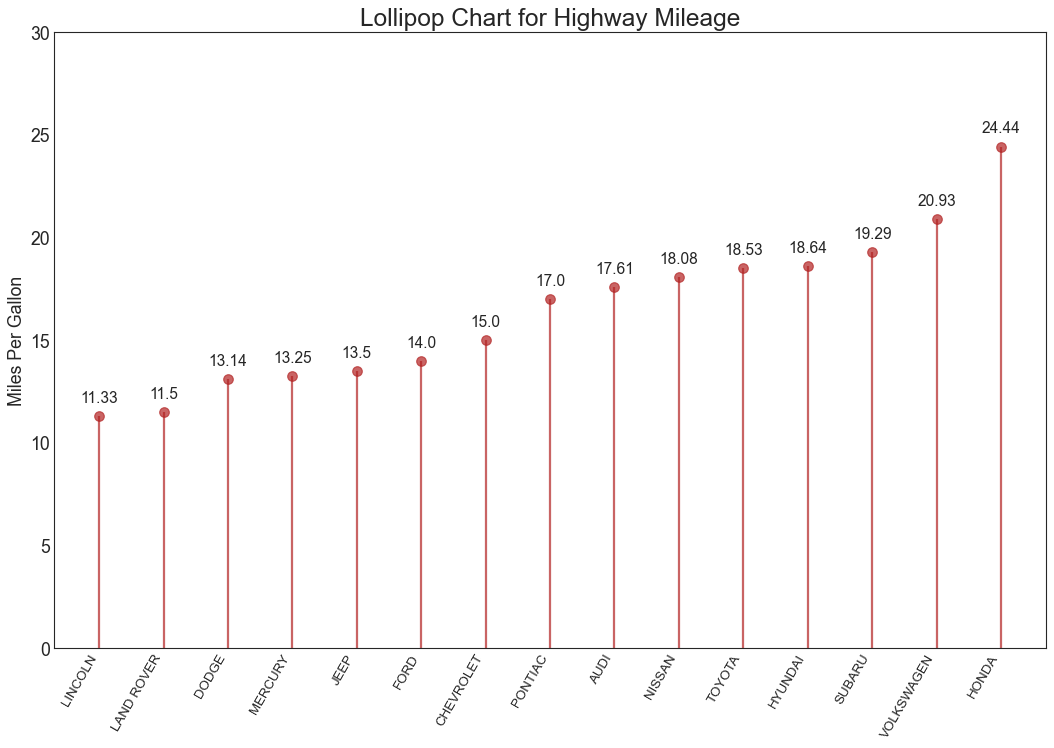

In [84]:
# Prepare Data
df_raw = pd.read_csv("Data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()

### 包点图 （Dot Plot）

包点图表传达了项目的排名顺序，并且由于它沿水平轴对齐，因此您可以更容易地看到点彼此之间的距离。

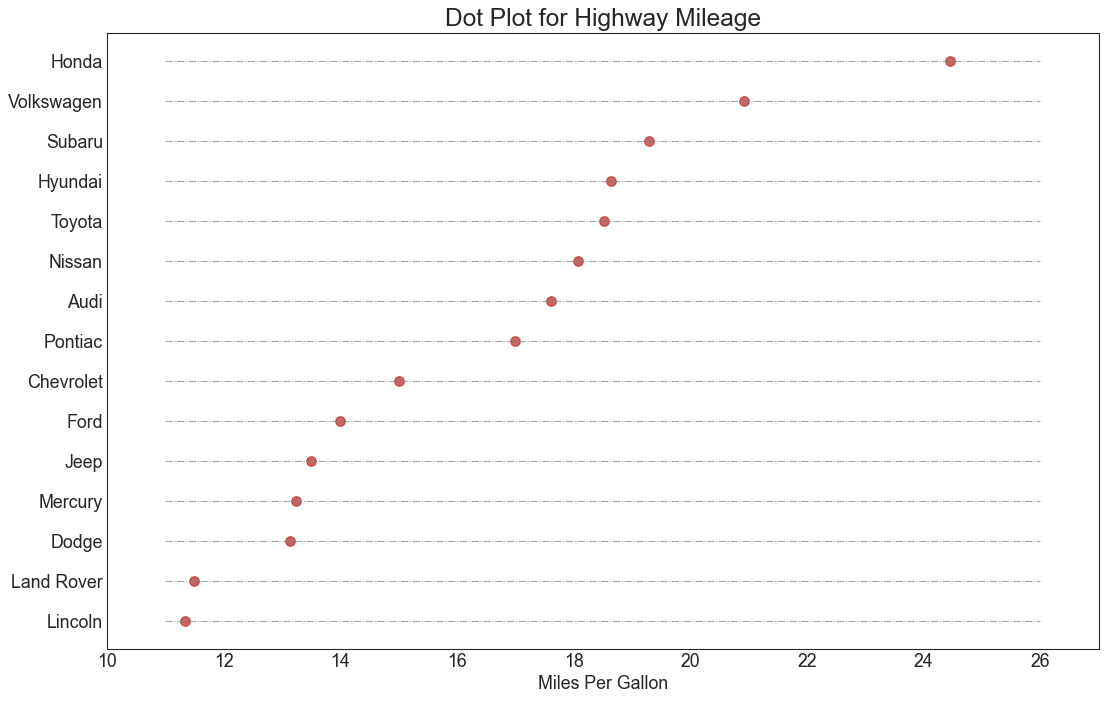

In [85]:
# Prepare Data
df_raw = pd.read_csv("Data/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

### 坡度图 （Slope Chart）

坡度图最适合比较给定人/项目的“前”和“后”位置。

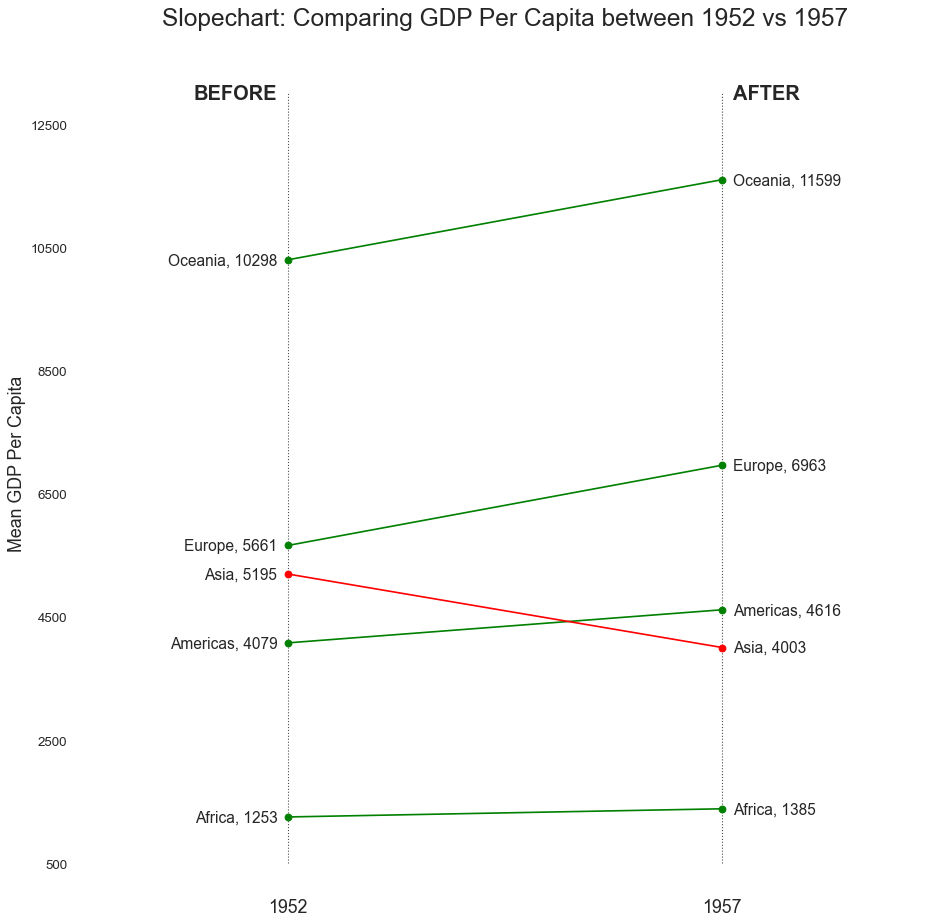

In [86]:
import matplotlib.lines as mlines
# Import Data
df = pd.read_csv("Data/gdppercap.csv")

left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.continent, df['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df['1952'], df['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['1952'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=df['1957'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['1952'], df['1957'], df['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

### 哑铃图 （Dumbbell Plot）

哑铃图表传达了各种项目的“前”和“后”位置以及项目的等级排序。 如果您想要将特定项目/计划对不同对象的影响可视化，那么它非常有用。

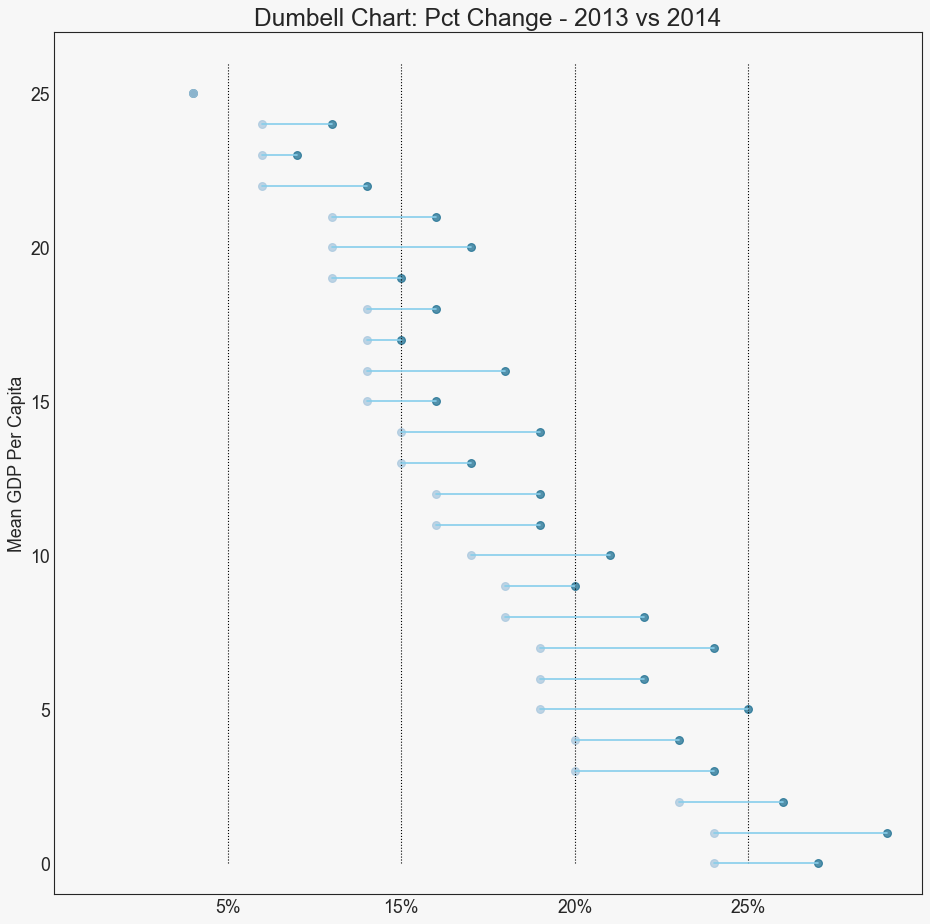

In [87]:
import matplotlib.lines as mlines

# Import Data
df = pd.read_csv("Data/health.csv")
df.sort_values('pct_2014', inplace=True)
df.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(14,14), facecolor='#f7f7f7', dpi= 80)

# Vertical Lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['index'], x=df['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df['index'], x=df['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(df['index'], df['pct_2013'], df['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])    
plt.show()